# Gaussian probability density function
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

- The symbol $\mu$ `represents a population mean`
- The symbol $\sigma$ `is the standard deviation of the distribution, which represents the spread`.

The mean and standard deviation are constants when dealing witha population.
So for a specific population, the only value that varies is x.

In [41]:
# Say on average, the minimum winter temperature in San Francisco is 50 degrees Fahrenheit.
# Let's say the standard deviation is 10 degrrees

# Given that the mean is 50 and the standard deviation is 10
# calculate the probability density function f(x) of the Gaussian distribution
# Use the following temperature data: x = [29, 45, 48, 50, 62, 78]
import numpy as np
from scipy.stats import norm
def density(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*np.power(sigma, 2.))) * np.exp( -np.power(x - mu, 2)  / (2 * np.power(sigma, 2)))

y = density(50, 50, 10)
print(y)

y2 = norm(loc = 50, scale = 10).pdf(50)
assert y == y2
print(f"norm(loc = 50, scale = 10).pdf(50) = {y2}")

0.03989422804014327
norm(loc = 50, scale = 10).pdf(50) = 0.03989422804014327


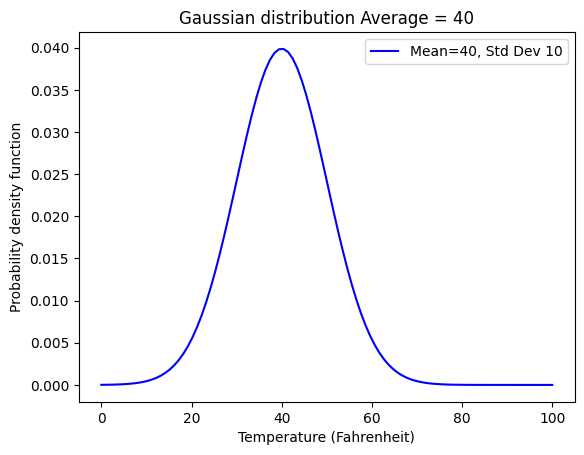

In [33]:
# What exactly does the mean value represent in a Gaussian distribution
# The mean value is the center of the bell curve.

# Take a look at the visualization below. 
# Staying with the San Francisco temperature example,
# it shows three distributions with three different means
# Everything else stays the same including the standard deviation

from matplotlib import pyplot as plt
%matplotlib inline

def visualize_gaussian(x, mu, sigma):
    y = density(x, mu, sigma)
    plt.plot(x, y, color = "blue")
    plt.xlabel("Temperature (Fahrenheit)")
    plt.ylabel("Probability density function")
    plt.title(f"Gaussian distribution Average = {mu}")    
    plt.legend([f"Mean={mu}, Std Dev {sigma}"])
    plt.show()
    return None

x = np.linspace(0, 100, 100)
visualize_gaussian(x, 40, 10)


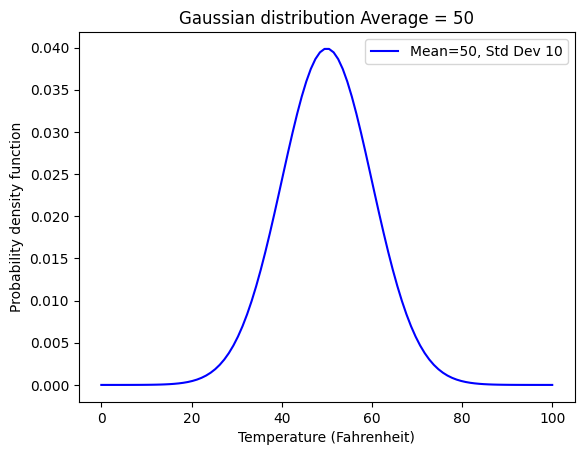

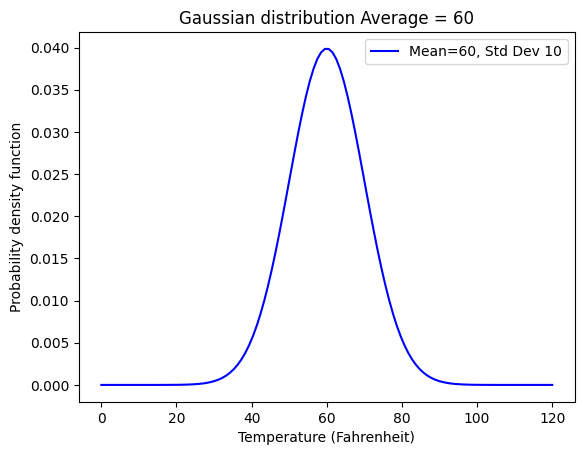

In [30]:
visualize_gaussian(x, 50, 10)

x = np.linspace(0, 120, 120)
visualize_gaussian(x, 60, 10)

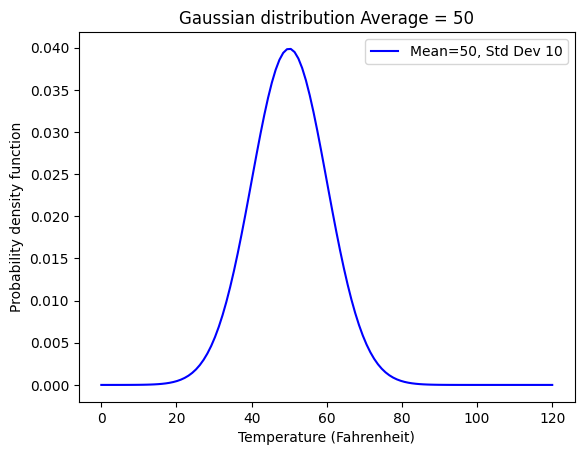

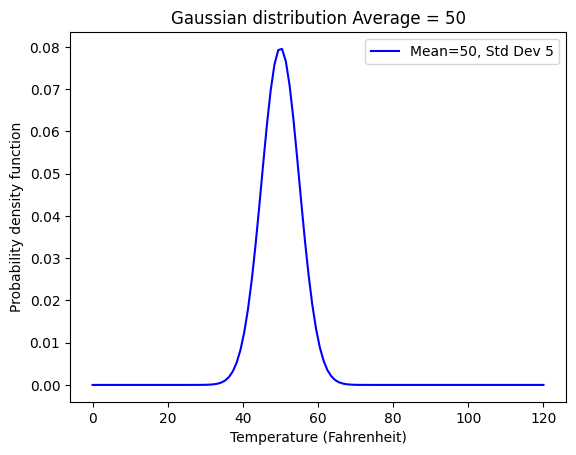

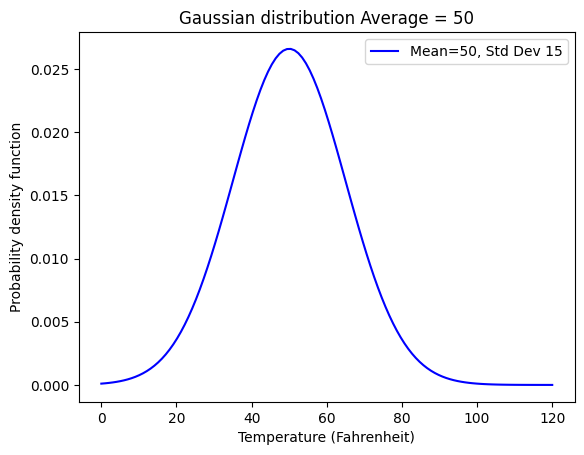

In [31]:
visualize_gaussian(x, 50, 10)
visualize_gaussian(x, 50, 5)
visualize_gaussian(x, 50, 15)

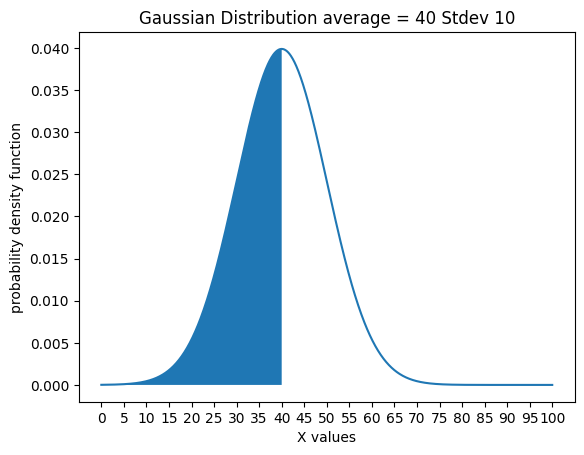

In [62]:
def plot_fill(dist, x, a, b, title):
    y = dist.pdf(x)

    x_ab = np.linspace(a, b, 1000)
    y_ab = dist.pdf(x_ab)

    plt.plot(x, y)
    plt.fill_between(x_ab, y_ab)
    plt.xticks(np.linspace(x[0], x[len(y)-1], 21))
    plt.xlabel('X values')
    plt.ylabel("probability density function")
    plt.title(title)
    plt.show()

mu = 40
sigma = 10

dist = norm(mu, sigma)

x = np.linspace(0, 100, 1000)

a = 0
b = 40
plot_fill(dist, x, a, b, f"Gaussian Distribution average = {mu} Stdev {sigma}")

In [64]:
def gaussian_probability(mu, sigma, a, b):
    gauss = norm(mu, sigma)
    return gauss.cdf(b) - gauss.cdf(a)


In [67]:
assert float(f"{gaussian_probability(50, 10, 25, 75):.8f}") == 0.98758067